In [1]:
import functools as F
import numpy as np
import pandas as pd

from IPython.display import display, HTML
from typing import *

In [2]:
with open('AppSettings\\style.css', 'r') as f:
    css = str.join('', f.readlines())

HTML(f'<style>{css}</style>')

In [3]:
OHCO: List[str] = [
      'Page'
    , 'Paragraph'
    , 'Sentence'
    , 'Fragment'
    , 'Term'
]

# Rune Character Sections

In [4]:
M_ = '<img class="l0" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFjssvVVhMgAAAAFvck5UAc+id5oAAAc7SURBVHja7d0xEcAwDATBOBP+qMzLZhEVt4tAxc23WueBnnf6AJggfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkfftMnwD/s/gkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScubW4osPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkkXAyQJJjmbdHEAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjI6NTk6NDQrMDA6MDDnlTUMAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIyOjU5OjQ0KzAwOjAwlsiNsAAAAABJRU5ErkJggg==">'

T1 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwUvZFtBwgAAAAFvck5UAc+id5oAAAdBSURBVHja7dTBCYBADABBTyzL8u3rLMGPkMfOFBASWLL2AT3n9AIwQfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSbqe/e/Ae02fBN98fJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ+ktac3gAE+PknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkkvZxYJY3K35L8AAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDU6NDcrMDA6MDBggLrYAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjA1OjQ3KzAwOjAwEd0CZAAAAABJRU5ErkJggg==">'
T2 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwYDfa5+4gAAAAFvck5UAc+id5oAAAdXSURBVHja7d3BCcNAEARBnXFYCt95SSH4s+hsuioAoYNmv7OuA3peu38AdhA+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJLen2v2g+fa/ST4zsUnSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSVrDM7fH9G7uE2zz9rj4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknjO7f/6Ne3ee3wznPxSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJLs3JLk4pMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZN0A92pD19YKyXTAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIyLTA1LTEwVDIzOjA2OjAyKzAwOjAwXcUghgAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMi0wNS0xMFQyMzowNjowMiswMDowMCyYmDoAAAAASUVORK5CYII=">'
T3 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwYg38kPkAAAAAFvck5UAc+id5oAAAdTSURBVHja7d3BCYRAFAVBRwzL8M1rTcDjwOh2VQAySPOvb/w2rpf/hHOsfsH/2Vc/AFYQPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHySjtkffPtm7BM7sj0uPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE/SMXuX1mYsX+DikyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CSNyTO38AkuPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkk3EJENZV1i7p8AAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDY6MzIrMDA6MDDTSidlAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjA2OjMyKzAwOjAwohef2QAAAABJRU5ErkJggg==">'
T4 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwcI82eWKwAAAAFvck5UAc+id5oAAAdESURBVHja7dSBCYAwEARBI5Zl+fYVmxAe3JkCwgWWX/uAnnN6AEwQPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHySrukBf/Tsb9+71/SP/sfFJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8Elae3oBDHDxSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSXoBJ1YJY2/d2IgAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDc6MDgrMDA6MDAWdxT2AAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjA3OjA4KzAwOjAwZyqsSgAAAABJRU5ErkJggg==">'
T5 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwYzW3dOTgAAAAFvck5UAc+id5oAAAdASURBVHja7dSBCYAwDABB61yO7151iULAv5sgCU/WvjjtPXzUZ01v9D/39AAwQfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSVp7egIY4OOTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGT9AFPVwlhnq6mCQAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMi0wNS0xMFQyMzowNjo1MSswMDowMCTNNH8AAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjItMDUtMTBUMjM6MDY6NTErMDA6MDBVkIzDAAAAAElFTkSuQmCC">'
T6 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwcgxtI+0QAAAAFvck5UAc+id5oAAAdXSURBVHja7d3BDYMwFAVBjCgr5acvaIGDiYl2pgDLh9W/vnFu0LOv/gCsIHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JB2rPwB3fM+577n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkl2boNmb8b+wmfMfc/FJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8Emyc/uAt+/Izt6M/UcuPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE/SePkkKzzCxSdJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwifpAp2vDSpny6x/AAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIyLTA1LTEwVDIzOjA3OjMyKzAwOjAwPIhMWwAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMi0wNS0xMFQyMzowNzozMiswMDowME3V9OcAAAAASUVORK5CYII=">'
T7 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwcuIWoT1gAAAAFvck5UAc+id5oAAAdSSURBVHja7d3BDYQwEARBTFyET153CfA0slFXRWBZrf3O+B3Mdm/+qddY/YL1ztUPgBWET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ+ksfkkKy/YfYf3yextXhefJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ8nOLZ8we5vXxSdJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJsnNLkotPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRP0h87cA8gzbdEJQAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMi0wNS0xMFQyMzowNzo0NiswMDowMMICYVEAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjItMDUtMTBUMjM6MDc6NDYrMDA6MDCzX9ntAAAAAElFTkSuQmCC">'

B1 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwMJ4AxjuQAAAAFvck5UAc+id5oAAAdBSURBVHja7dTBCYBADABBTyzL8u3rLMGPkMfOFBASWLL2AT3n9AIwQfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSbqe/e/Ae02fBN98fJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ+ktac3gAE+PknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkkvzuwJYzPup2kAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDM6MDkrMDA6MDC56784AAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjAzOjA5KzAwOjAwyLYHhAAAAABJRU5ErkJggg==">'
B2 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwMYirxDSwAAAAFvck5UAc+id5oAAAdXSURBVHja7d3BCcNAEARBnXFYCt95SSH4s+hsuioAoYNmv7OuA3peu38AdhA+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJLen2v2g+fa/ST4zsUnSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSVrDM7fH9G7uE2zz9rj4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknjO7f/6Ne3ee3wznPxSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJLs3JLk4pMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZN0A/rKD1+3o3WgAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIyLTA1LTEwVDIzOjAzOjI0KzAwOjAwmhnZhQAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMi0wNS0xMFQyMzowMzoyNCswMDowMOtEYTkAAAAASUVORK5CYII=">'
B3 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwMnPNpudgAAAAFvck5UAc+id5oAAAdYSURBVHja7d3BDcJAEARBDjkswicvkwDiddLadFUE+2jtd9b5gJ7n9AEwQfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSTqmD7iC9zl9wW+vNX3B//HxSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJK279xefTP2GzuyPT4+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET9Kxe5fWZix34OOTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JK3NM7dwCz4+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+SR+PGw1niB3zywAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMi0wNS0xMFQyMzowMzozOSswMDowMDdkuNsAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjItMDUtMTBUMjM6MDM6MzkrMDA6MDBGOQBnAAAAAElFTkSuQmCC">'
B4 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwQfW5lALwAAAAFvck5UAc+id5oAAAdQSURBVHja7d3BDUAAEEVBRFnK1xdNYCVvpoI9vOz1r9cCPdv0ATBB+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5Jwidpnz7gD85r+oJvHev0BfN8fJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8kO7cveHpHtrbD+wUfnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwifJzu0L7NL+n49PkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThk3QD6F4MLNu+bScAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDQ6MzErMDA6MDDmV+3FAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjA0OjMxKzAwOjAwlwpVeQAAAABJRU5ErkJggg==">'
B5 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwQuCkdAFQAAAAFvck5UAc+id5oAAAdESURBVHja7dSBCYAwEARBI5Zl+fYVmxAe3JkCwgWWX/uAnnN6AEwQPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHySrukBf/Tsb9+71/SP/sfFJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8Elae3oBDHDxSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSXoBJJoJY6/UpyUAAAAldEVYdGRhdGU6Y3JlYXRlADIwMjItMDUtMTBUMjM6MDQ6NDYrMDA6MDApNdpSAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDIyLTA1LTEwVDIzOjA0OjQ2KzAwOjAwWGhi7gAAAABJRU5ErkJggg==">'
B6 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwUBuI1MDQAAAAFvck5UAc+id5oAAAdhSURBVHja7d3BDYNADADBXERZlE9fpAmIETtTAPJJK394eJ0f6PlODwAThE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfpG16gDc6zmu/t6/pF72PjU+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTtM7pCWCAjU+S8EkSPknCJ0n4JAmfJOGTJHyShE/SNj3AExyx39f7mp5gno1PkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThk+TO7Q2uviNbu8P7DzY+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5I7tzdwl/b5bHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfpB++IA8sB0wp+gAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMi0wNS0xMFQyMzowNTowMSswMDowMIcagRgAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjItMDUtMTBUMjM6MDU6MDErMDA6MDD2RzmkAAAAAElFTkSuQmCC">'
B7 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwUQ0j1s/wAAAAFvck5UAc+id5oAAAdXSURBVHja7d3BDYMwFAVBjCgr5acvaIGDiYl2pgDLh9W/vnFu0LOv/gCsIHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JB2rPwB3fM+577n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPkl2boNmb8b+wmfMfc/FJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8Emyc/uAt+/Izt6M/UcuPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE/SePkkKzzCxSdJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwifpAiONDSoupg3tAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIyLTA1LTEwVDIzOjA1OjE2KzAwOjAwjhe/CAAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMi0wNS0xMFQyMzowNToxNiswMDowMP9KB7QAAAAASUVORK5CYII=">'
B8 = '<img class="l1" height="48" width="24" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAKyCAQAAAB85K0YAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5gUKFwUg9ORcUwAAAAFvck5UAc+id5oAAAdXSURBVHja7d2xDcJQEAVBPqIsl09fdgPIkdEZdqaCC1aXvrU/oOc5fQBMED5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8kl7TB/yj9z59wbltTV8wz8cnSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSRI+ScInSfgkCZ8k4ZMkfJKET5LwSVo3n2TlC+6+w/vJ1du8Pj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkvBJEj5JwidJ+CQJnyThkyR8koRPkp1bfsLV27w+PknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+SnVuSfHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHyShE+S8EkSPknCJ0n4JAmfJOGTJHySDm4+DyK+EpKeAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIyLTA1LTEwVDIzOjA1OjMyKzAwOjAwOH2cZgAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMi0wNS0xMFQyMzowNTozMiswMDowMEkgJNoAAAAASUVORK5CYII=">'

# need rune border image...

RUNE_T: List[Tuple[str]] = [
      ('', T1)
    , ('', T2)
    , ('', T3)
    , ('', T4, T5)
    , ('', T6)
    , ('', T7)
]
RUNE_B: List[Tuple[str]] = [
      ('', B1)
    , ('', B2)
    , ('', B3)
    , ('', B4, B5, B6)
    , ('', B7)
    , ('', B8)
]

In [5]:
def clean_terms(row: pd.DataFrame) -> str:
    '''Cleans and formats terms'''
    if row.TermType:
        return row.TermText
    
    return row.TermText.replace('\n', '').replace(' ', '')


def term_to_raw(row: pd.DataFrame) -> str:
    '''Converts term text to raw term'''
    if row.TermType:
        return row.TermText
    
    return row.TermText.replace('[', '').replace(']', '').replace('|', '')


def term_to_rune(row: pd.DataFrame) -> str:
    '''Converts term text to term rune'''
    if row.TermType:
        return f'<div class="plain_text">{row.TermText}</div>'
    
    characters = []
    for section in row.TermText.split(']['):
        split = (section
            .replace('-', '0')
            .replace('[', '')
            .replace(']', '')
            .split('|')
        )
        t = [RUNE_T[i][int(c)] for i, c in enumerate(split[0])]
        b = [RUNE_B[i][int(c)] for i, c in enumerate(split[1])]
        
        characters.append(f'<div class="rune_character_section">{M_}{str.join("", t)}{str.join("", b)}</div>')
  
    div_join = '</div><div class="rune_character">'
    return f'<div class="rune"><div class="rune_character">{str.join(div_join, characters)}</div></div>'


# may need to redo, page 6 returns as list
# could be more readable anyway
def build_rune_text(df: pd.DataFrame) -> List[str]:
    '''Builds text of runes for display'''
    return (df
        .groupby('Paragraph')
        .apply(lambda paragraph: '<div class="rune_text_row">' + paragraph
            .groupby('Sentence')
            .apply(lambda sentence: str.join('', sentence
                .groupby('Fragment')
                .apply(lambda fragment: str.join('', fragment
                    .Rune
                    .map(lambda x: f'<div class="rune_text_col">{x}</div>')
                ) 
                + f'<div class="rune_text_col plain_text">{fragment.FragmentSeparator.iloc[0] or ""}</div>')
            ) 
            + f'<div class="rune_text_col plain_text">{sentence.SentenceEndmark.iloc[0] or ""}</div></div>')
        )
        .values
    )

In [6]:
DF_CORPUS = (pd
    .read_xml(
          'text\\transcript.xml'
        , stylesheet = 'AppSettings\\corpus_stylesheet.xsl'
    )
    .assign(
          TermText = lambda x: x.apply(clean_terms, axis = 'columns')
        # , RawTerm  = lambda x: x.apply(term_to_raw, axis = 'columns')
        , Rune     = lambda x: x.apply(term_to_rune, axis = 'columns')
    )
    # .set_index(OHCO)
)
DF_CORPUS

,Page,Paragraph,Sentence,Fragment,Term,ParagraphType,ParagraphReference,SentenceType,SentenceEndmark,FragmentSeparator,TermType,TermText,RawTerm,Rune
0,3,0,0,0,0,page_title,None,None,...,",",plain_text,A,A,"<div class=""plain_text"">A</div>"
1,3,0,0,0,1,page_title,None,None,...,",",plain_text,Long,Long,"<div class=""plain_text"">Long</div>"
2,3,0,0,1,0,page_title,None,None,...,None,plain_text,Long,Long,"<div class=""plain_text"">Long</div>"
3,3,0,0,1,1,page_title,None,None,...,None,plain_text,Time,Time,"<div class=""plain_text"">Time</div>"
4,3,0,0,1,2,page_title,None,None,...,None,plain_text,Ago,Ago,"<div class=""plain_text"">Ago</div>"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,13,4,2,0,7,None,None,None,.,None,None,[1112-1|11-111][1----1|11--1-],1112-111-1111----111--1-,"<div class=""rune""><div class=""rune_character"">..."
377,13,4,3,0,0,None,None,None,.,None,None,[---11-|---2--][1--21-|11-21-][---21-|--12--],---11----2--1--21-11-21----21---12--,"<div class=""rune""><div class=""rune_character"">..."
378,13,4,3,0,1,None,None,None,.,None,picture,A Button,A Button,"<div class=""plain_text"">A Button</div>"
379,13,4,3,0,2,None,None,None,.,None,plain_text,And,And,"<div class=""plain_text"">And</div>"


In [10]:
DF_CORPUS.query("Page == 6")

,Page,Paragraph,Sentence,Fragment,Term,ParagraphType,ParagraphReference,SentenceType,SentenceEndmark,FragmentSeparator,TermType,TermText,RawTerm,Rune
271,6,0,0,0,0,None,None,title,None,None,None,[1-1211|1----1][111---|1-1--1][-1----|-11-11][...,1-12111----1111---1-1--1-1-----11-111--21-11--...,"<div class=""rune""><div class=""rune_character"">..."
272,6,0,0,0,1,None,None,title,None,None,None,[---11-|---2--][--12--|---2--][-1----|--1--1],---11----2----12-----2---1------1--1,"<div class=""rune""><div class=""rune_character"">..."
273,6,0,1,0,0,None,None,title,None,None,None,[--12-1|--12-1],--12-1--12-1,"<div class=""rune""><div class=""rune_character"">..."
274,6,0,1,0,1,None,None,title,None,None,None,[111-11|1-12-1][1-12-1|111-11],111-111-12-11-12-1111-11,"<div class=""rune""><div class=""rune_character"">..."
275,6,0,1,0,2,None,None,title,None,None,None,[1-12-1|11-1-1][1-12--|11-21-][11--1-|11-31-],1-12-111-1-11-12--11-21-11--1-11-31-,"<div class=""rune""><div class=""rune_character"">..."
276,6,0,2,0,0,None,None,title,None,None,None,[--12-1|--12-1],--12-1--12-1,"<div class=""rune""><div class=""rune_character"">..."
277,6,0,2,0,1,None,None,title,None,None,None,[--1111|-1121-],--1111-1121-,"<div class=""rune""><div class=""rune_character"">..."
278,6,0,2,0,2,None,None,title,None,None,None,[111111|1-1211],1111111-1211,"<div class=""rune""><div class=""rune_character"">..."
279,6,1,0,0,0,None,None,title,None,None,plain_text,Coveted,Coveted,"<div class=""plain_text"">Coveted</div>"
280,6,1,0,0,1,None,None,title,None,None,plain_text,In,In,"<div class=""plain_text"">In</div>"



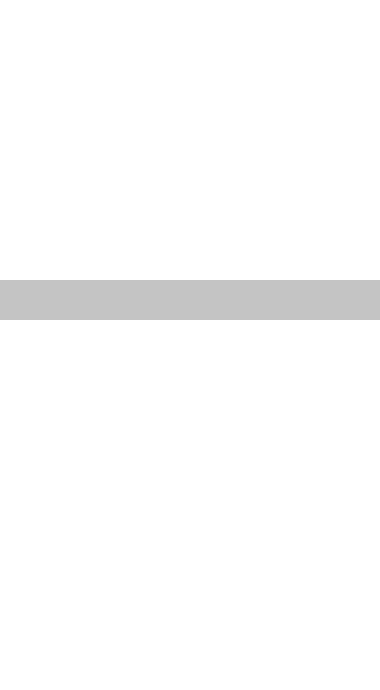
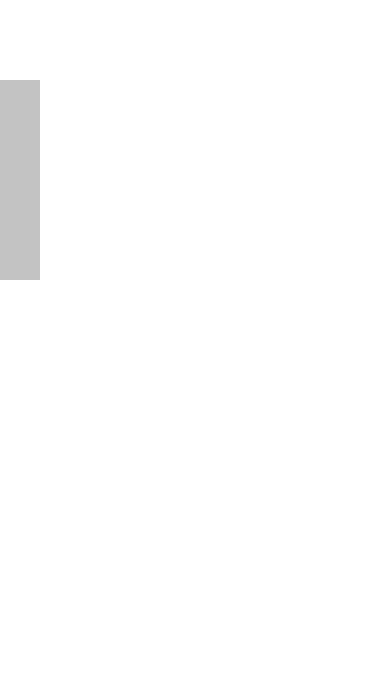
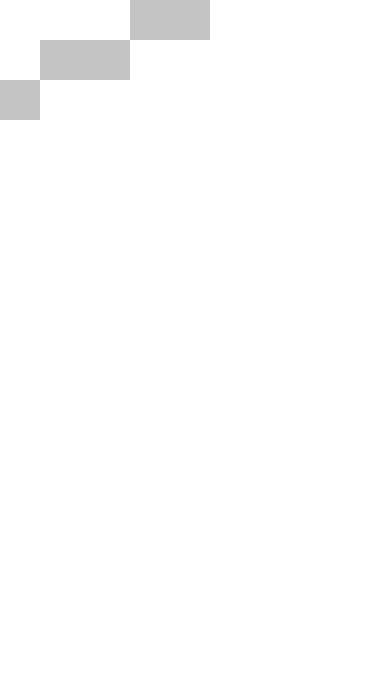
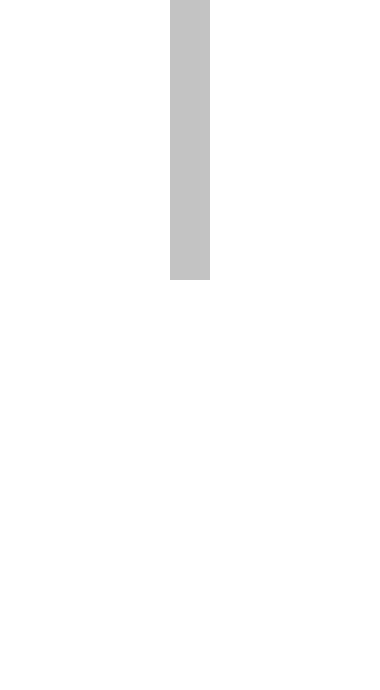
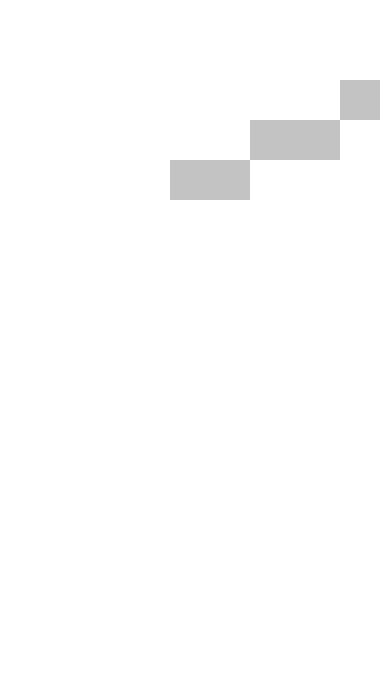
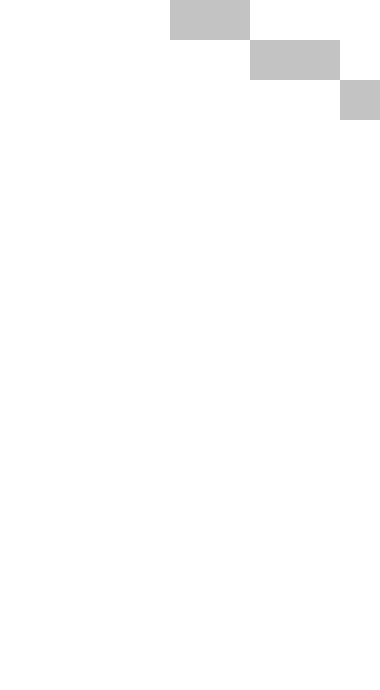
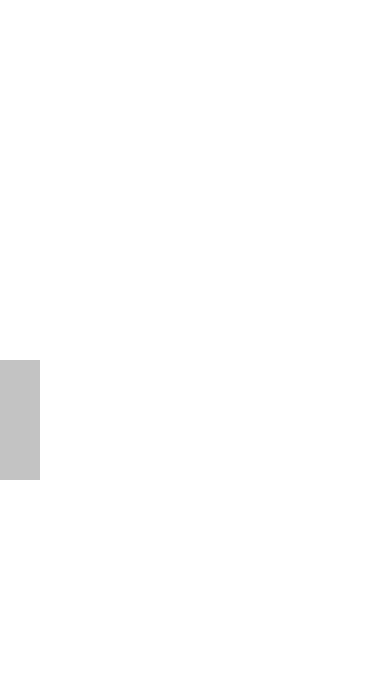
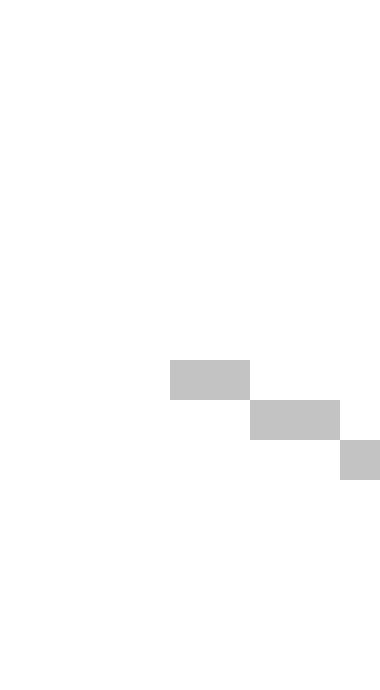
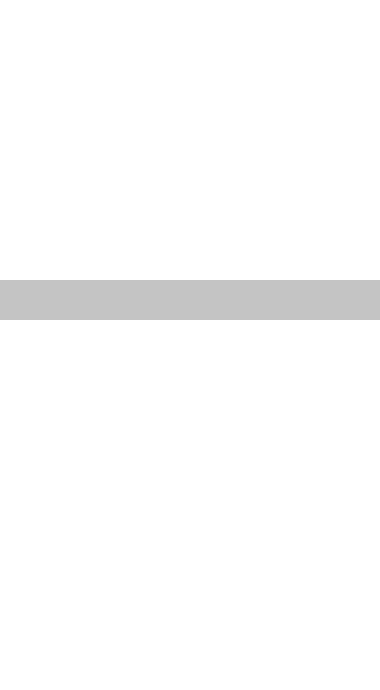
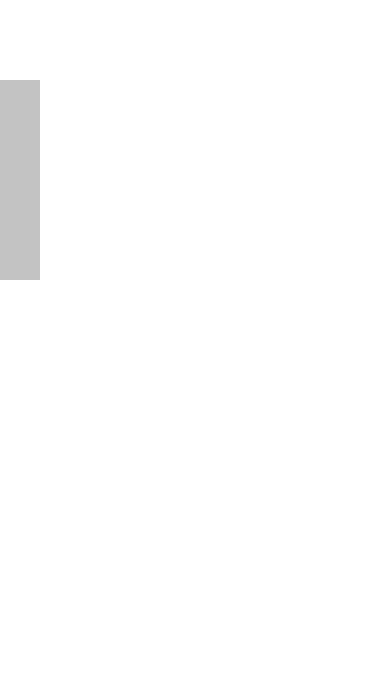
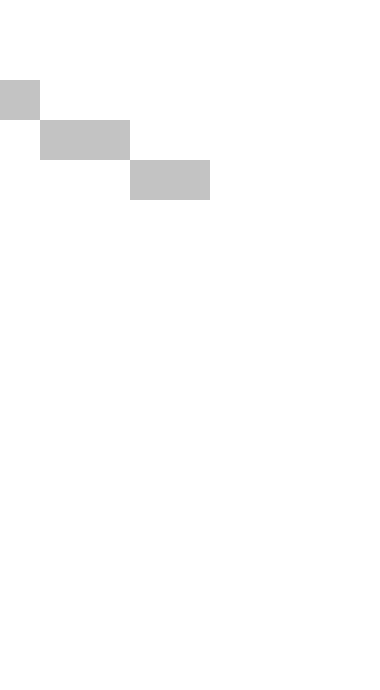
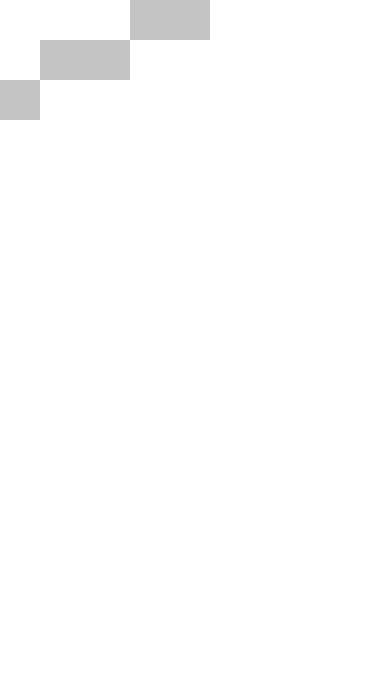
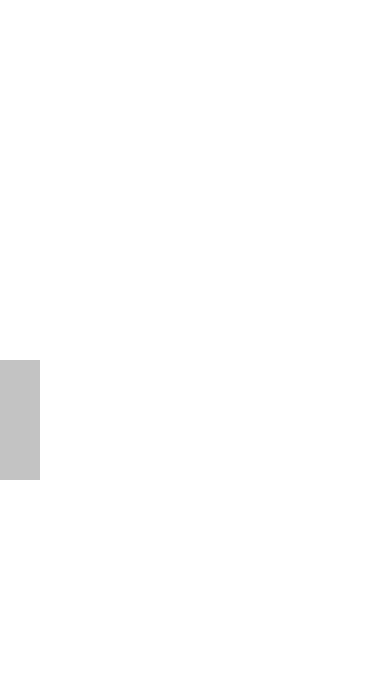
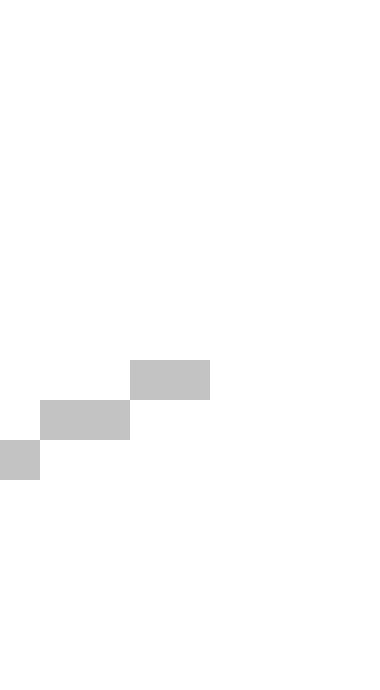
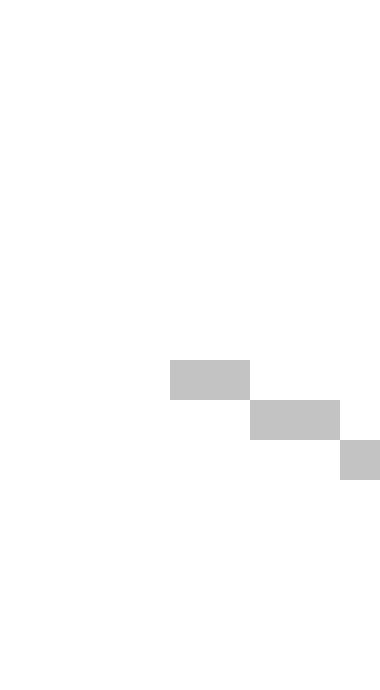
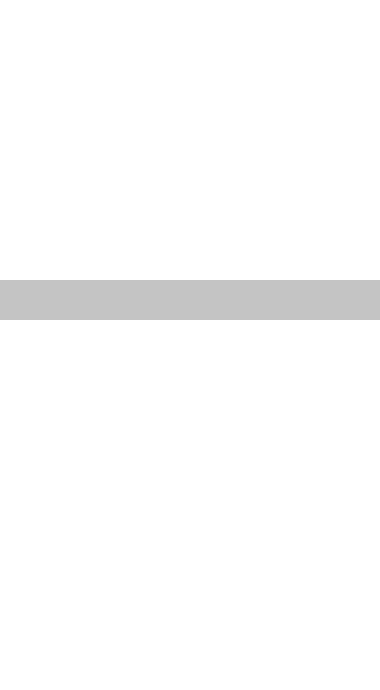
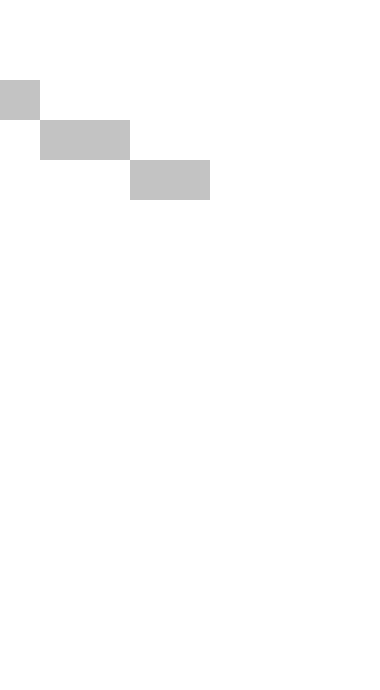
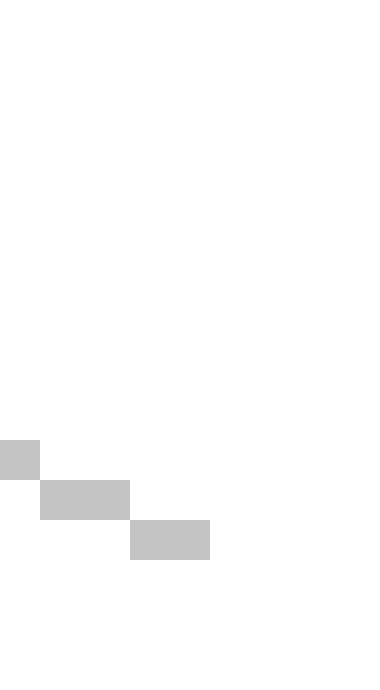
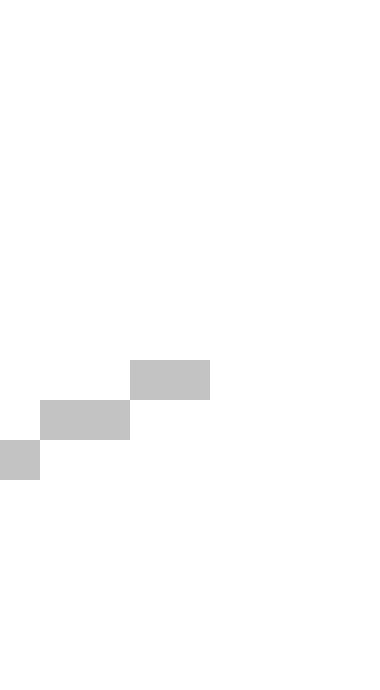
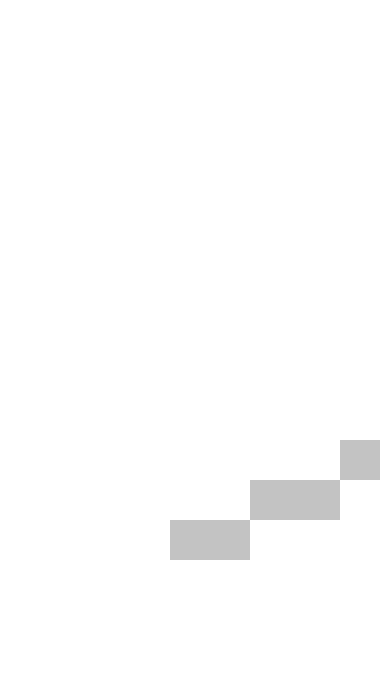
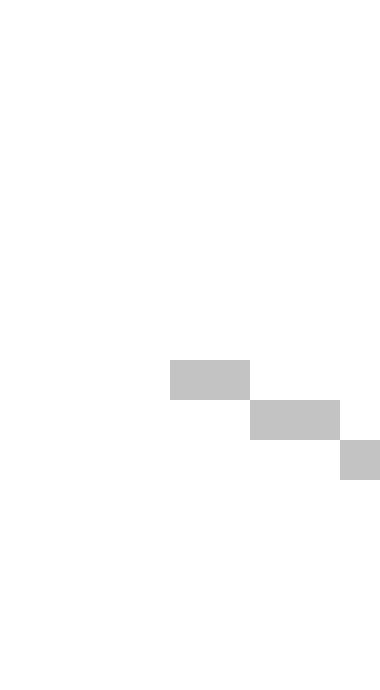
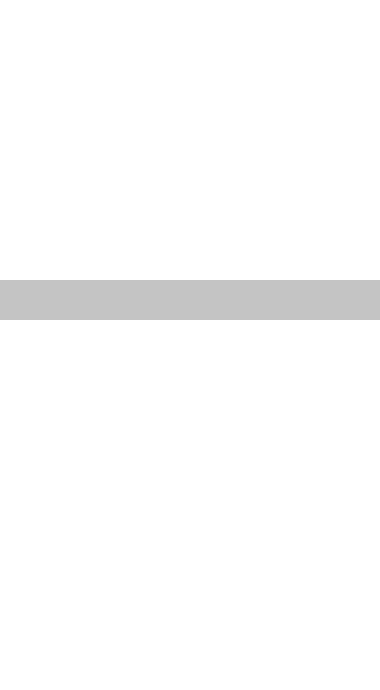
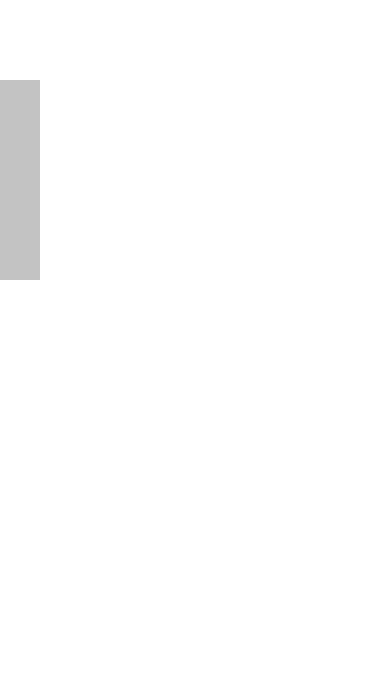
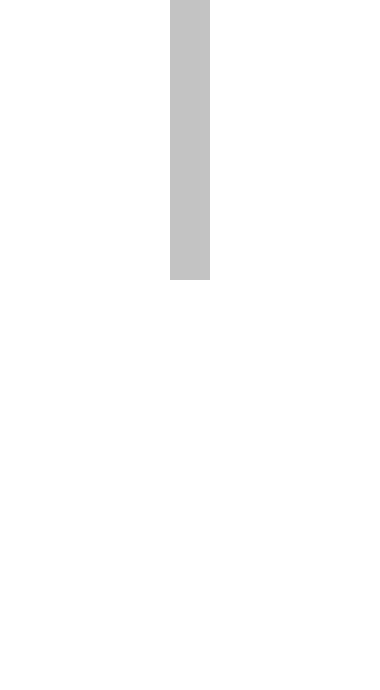
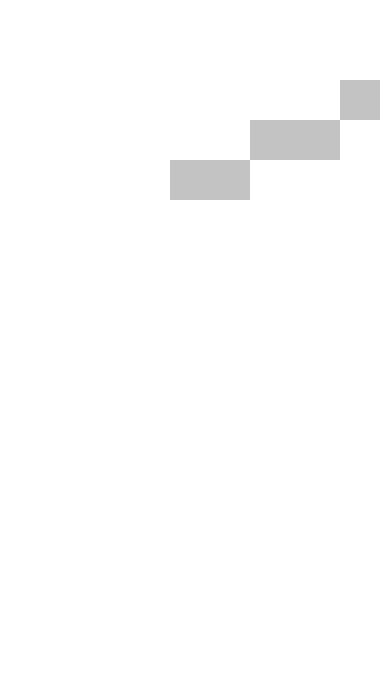
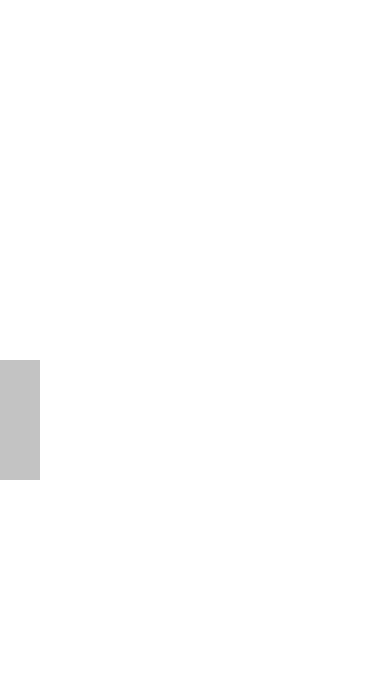
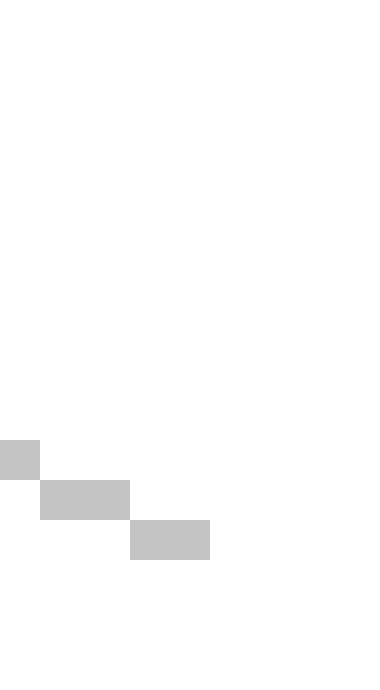
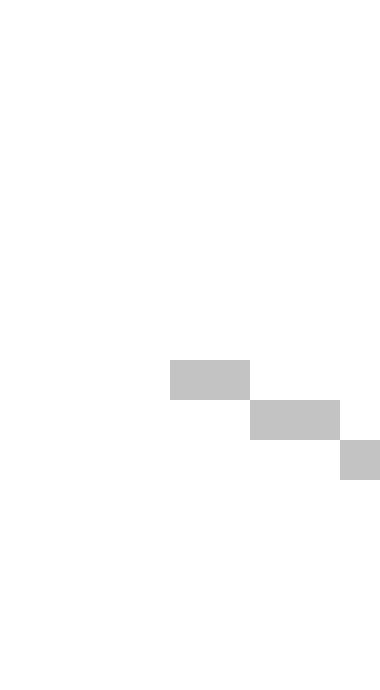
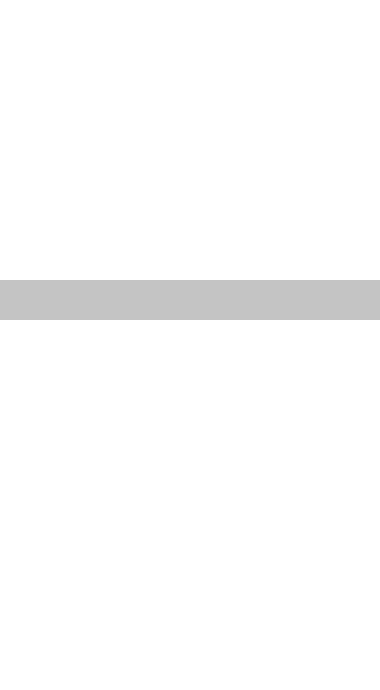
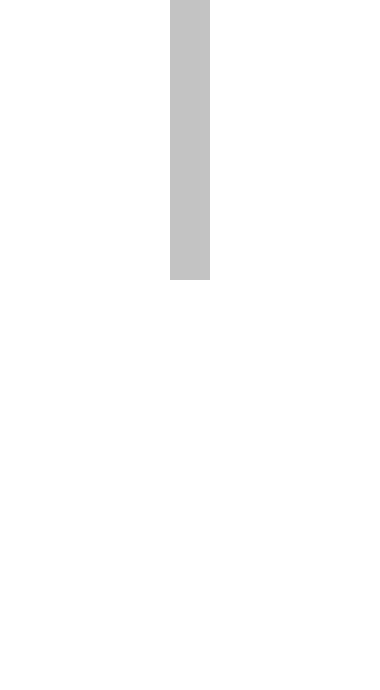
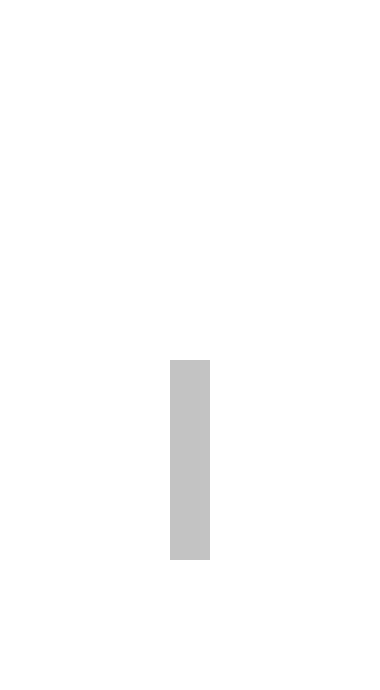
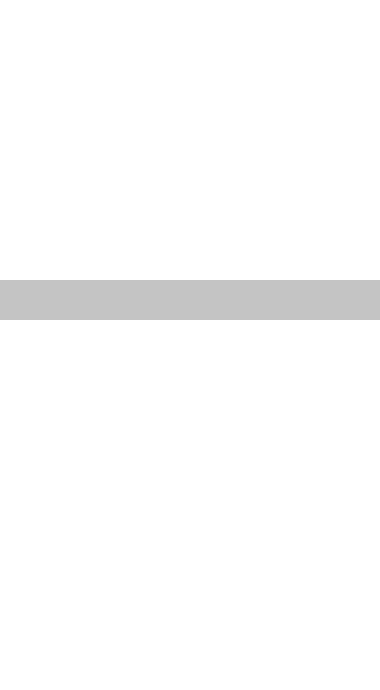
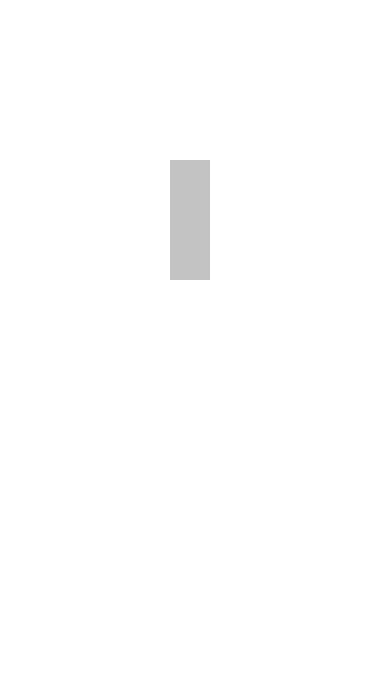
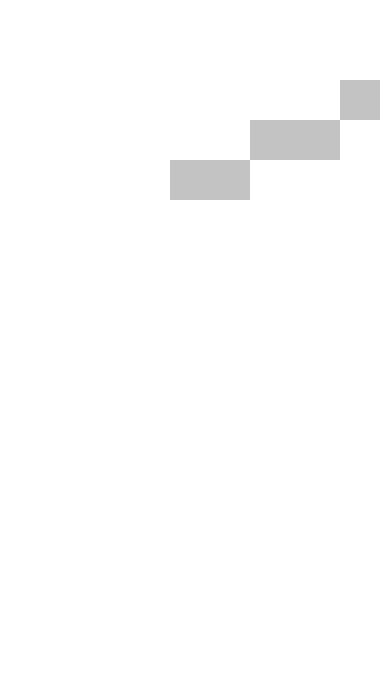
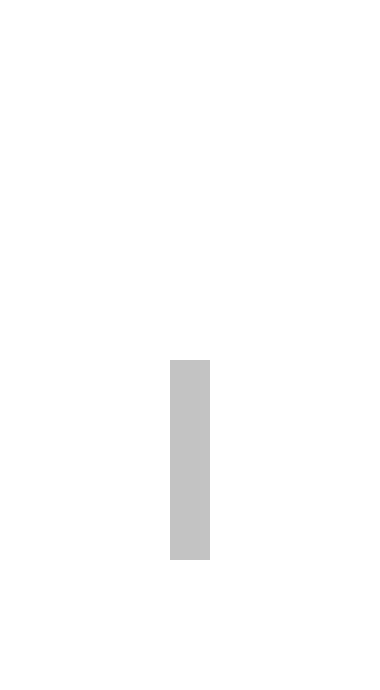
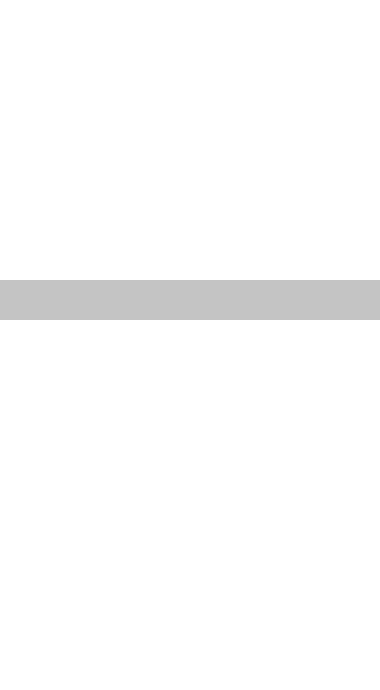
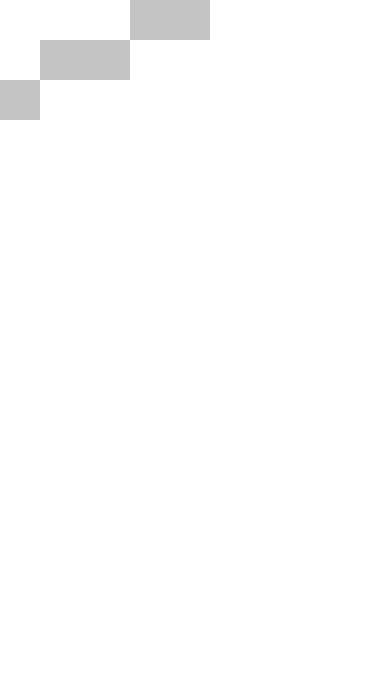
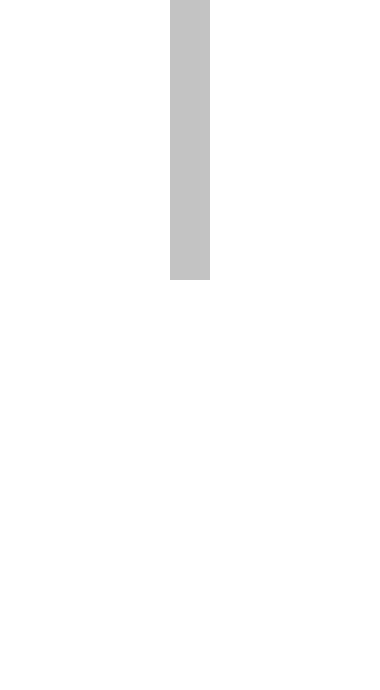
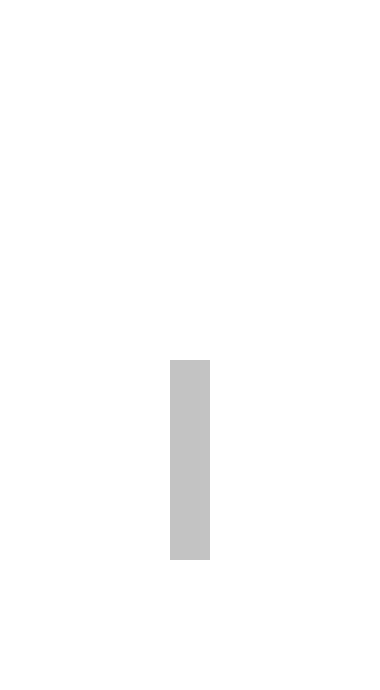
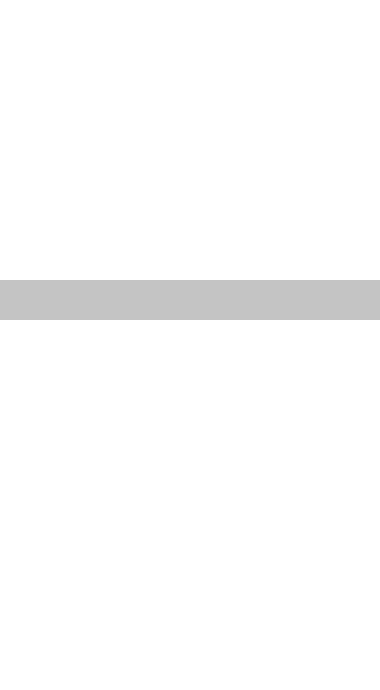
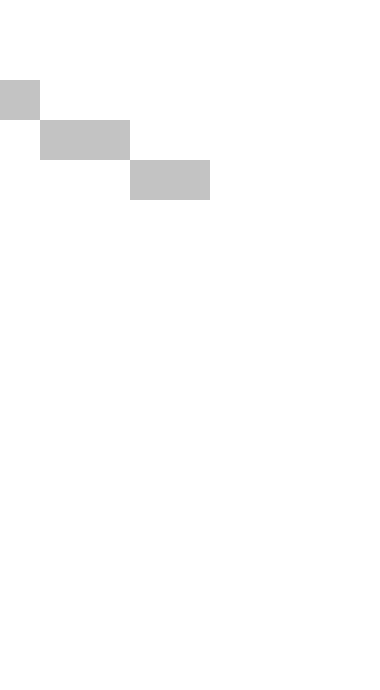
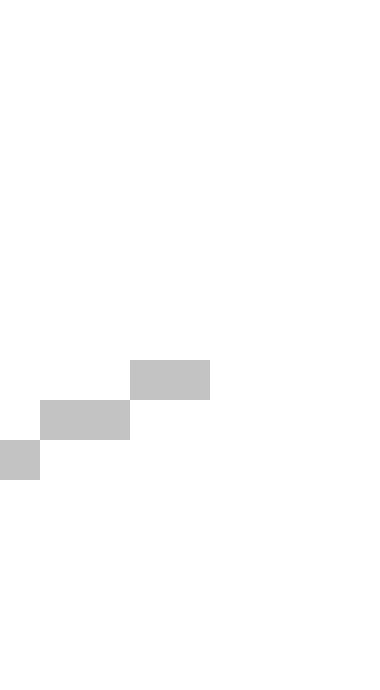
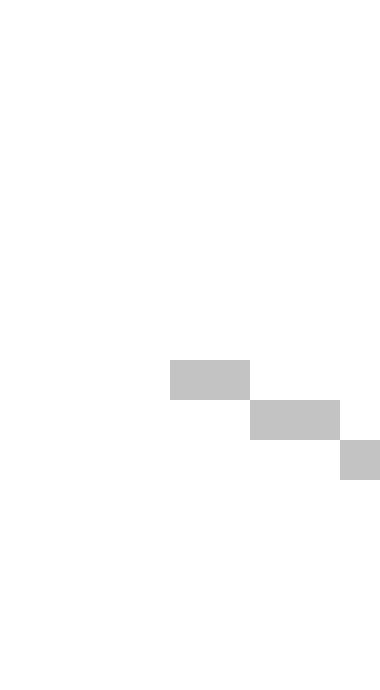

In [31]:
for row in build_rune_text(DF_CORPUS.query('Page == 6')):
    display(HTML(row[0]))
    
# for rune in DF_CORPUS.query('Page == 4 & Paragraph == 1 & Sentence == 5').Rune:
#     display(HTML(rune))